In [ ]:
!git clone https://github.com/soummyaah/FNXL.git

fatal: destination path 'FNXL' already exists and is not an empty directory.


In [ ]:
# prompt: read in all 4 datasets

import pandas as pd

# Read in all 4 datasets
df_test = pd.read_csv('/content/FNXL/dev_sample.csv')
df_val = pd.read_csv('/content/FNXL/test_sample.csv')
df_labels = pd.read_csv('/content/FNXL/labelCount.csv')
df_train = pd.read_csv('/content/FNXL/train_sample.csv')

df_train.head()

,sentence,numerals-tags,company,docEndDate,docType,fileName,year,ner_tags,tokens
0,"During the years ended December 31, 2020 and 2...",{'us-gaap:GeneralAndAdministrativeExpense': ['...,ANNALY CAPITAL MANAGEMENT INC,"December 31, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'years', 'ended', 'December'..."
1,The Operating Partnership incurred expenses pu...,{'us-gaap:RelatedPartyTransactionSellingGenera...,MGM Growth Properties LLC,"December 31, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Operating', 'Partnership', 'incurred'..."
2,Amounts reclassified from accumulated other co...,{'us-gaap:OtherComprehensiveIncomeLossReclassi...,COGNEX CORP,"December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['Amounts', 'reclassified', 'from', 'accumulat..."
3,"During the year ended October31, 2016, Agilent...",{'us-gaap:CostMethodInvestmentsOriginalCost': ...,"Agilent Technologies, Inc.","October 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'October31'..."
4,The remaining Assurant Employee Benefits unamo...,{'us-gaap:DisposalGroupDeferredGainOnDisposal'...,ASSURANT INC,2018-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'remaining', 'Assurant', 'Employee', '..."


In [ ]:
# prompt: combine df_test, df_val and df_train but create a new column that says whether the row came from test, val or train df

df_combined = pd.concat([df_test.assign(data_source='test'),
                         df_val.assign(data_source='val'),
                         df_train.assign(data_source='train')])
df_combined


,sentence,numerals-tags,company,docEndDate,docType,fileName,year,ner_tags,tokens,data_source
0,(a) - Balance includes $19.5 million of curren...,{'us-gaap:ContractWithCustomerLiabilityCurrent...,"ONEOK, Inc.","December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]","['(', 'a', ')', '-', 'Balance', 'includes', '$...",test
1,The remaining $6 million was accounted for as ...,{'us-gaap:DisposalGroupIncludingDiscontinuedOp...,MASCO CORPORATION,"December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'remaining', '$', '6', 'million', 'was...",test
2,The Court previously issued a partial judgment...,{'us-gaap:LitigationSettlementAmountAwardedFro...,ENTERGY CORPORATION,"December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Court', 'previously', 'issued', 'a', ...",test
3,"The Company capitalized $47.1 million, $29.7 m...",{'us-gaap:EmployeeServiceShareBasedCompensatio...,TWILIO INC.,"December 31, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Company', 'capitalized', '$', '47.1',...",test
4,The performance of the Company’s annual impair...,{'us-gaap:GoodwillAndIntangibleAssetImpairment...,NEWS CORPORATION,"June 30, 2020",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 0, 0,...","['The', 'performance', 'of', 'the', 'Company',...",test
...,...,...,...,...,...,...,...,...,...,...
995,"During the year ended December31, 2018, the Co...",{'us-gaap:RepaymentsOfAccountsReceivableSecuri...,AMERICAN HOMES 4 RENT,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'December31...",train
996,Identifiable intangible assets of $3.7 million...,{'us-gaap:BusinessCombinationRecognizedIdentif...,BOTTOMLINE TECHNOLOGIES INC /DE/,"June 30, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 0, 2660, 0, 0, 0, 0, 0, 0, 0, 0, ...","['Identifiable', 'intangible', 'assets', 'of',...",train
997,There were fewer than 0.2 million potential co...,{'us-gaap:AntidilutiveSecuritiesExcludedFromCo...,CDW Corp,2018-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,19,"[0, 0, 0, 0, 2654, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['There', 'were', 'fewer', 'than', '0.2', 'mil...",train
998,Total deferred revenue was $217 million as of ...,{'us-gaap:ContractWithCustomerLiability': ['21...,"INTERCONTINENTAL EXCHANGE, INC.","December 31, 2019",10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,20,"[0, 0, 0, 0, 0, 2668, 0, 0, 0, 0, 0, 0, 0, 0, ...","['Total', 'deferred', 'revenue', 'was', '$', '...",train


In [ ]:
# Handling missing values
# For numerical columns, fill in missing values with the median (you can adjust based on your data)
# df_combined.fillna(df_combined.median(), inplace=True)

In [ ]:
# Remove duplicates
df_combined.drop_duplicates(inplace=True)

# Standardize date formats (Example)
# Adjust 'date_column' to your actual date column name
df_combined['docEndDate'] = pd.to_datetime(df_combined['docEndDate'], errors='coerce')

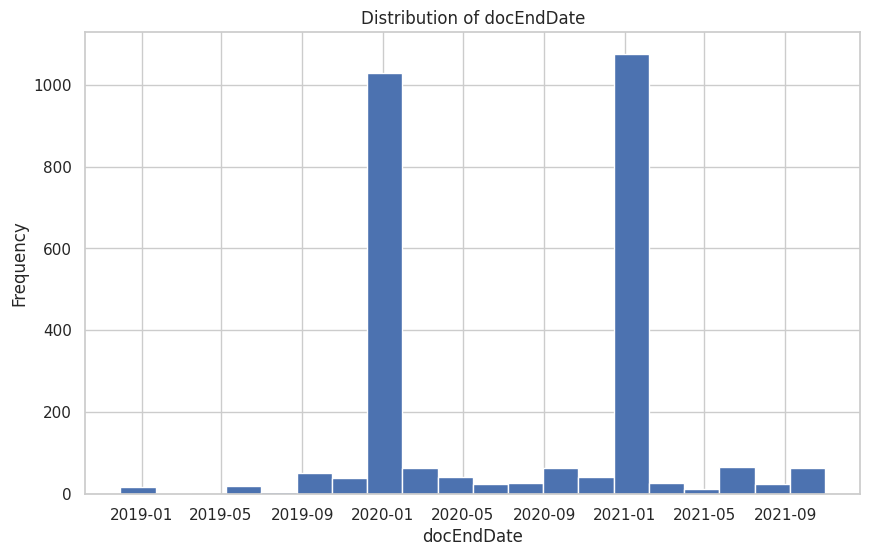

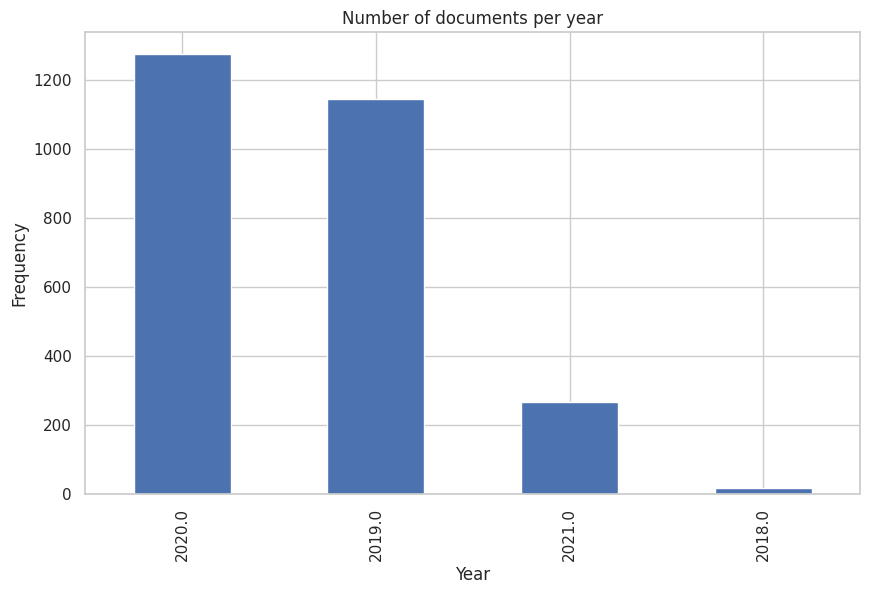

In [ ]:
# prompt: plot the docEndDate, year seperate plots

import matplotlib.pyplot as plt

# Plot docEndDate as a histogram
plt.figure(figsize=(10, 6))
df_combined['docEndDate'].hist(bins=20)
plt.xlabel('docEndDate')
plt.ylabel('Frequency')
plt.title('Distribution of docEndDate')
plt.show()

# Extract year from docEndDate and plot as a bar chart
df_combined['docYear'] = df_combined['docEndDate'].dt.year
df_year_counts = df_combined['docYear'].value_counts()

plt.figure(figsize=(10, 6))
df_year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Number of documents per year')
plt.show()


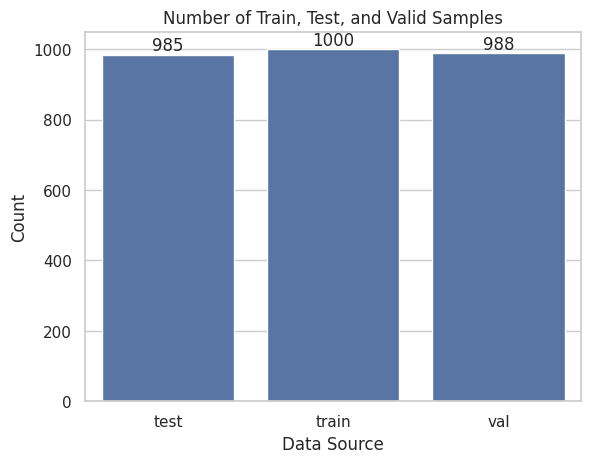

In [ ]:
# prompt: plot the number of train, test and valid in df_combined and include the actual number of each as well

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to identify the data source
df_combined['data_source'] = df_combined['data_source'].astype('category')

# Group the data by data source and count the number of rows
data_source_counts = df_combined.groupby('data_source').size().reset_index(name='count')

# Create a bar chart
sns.barplot(x='data_source', y='count', data=data_source_counts)

# Add the actual number of each data source to the plot
for i, row in data_source_counts.iterrows():
    plt.text(i, row['count'], str(row['count']), ha='center', va='bottom')

# Add title and labels
plt.title('Number of Train, Test, and Valid Samples')
plt.xlabel('Data Source')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Assuming 'numerical_columns' is a list of your numerical column names
scaler = StandardScaler()

numeric_columns = df_combined.select_dtypes(include=[np.number]).columns.tolist()

# Fit and transform the data
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])


In [ ]:
# prompt: i want to add months for df_combined

df_combined['docMonth'] = df_combined['docEndDate'].dt.month


In [ ]:
import pandas as pd

# Assuming df_combined is your DataFrame and it has a column 'sentence' with text data
keywords_trading_volume = ["trading", "share", "volume", "market", "stock", "transactions",
                           "equity", "activity", "trade", "traded", "liquidity",
                           "shares", "trading"]
keywords_regulatory_changes = ["changes", "SEC filings", "regulation", "regulatory",
                               "compliance", "oversight", "legal amendments", "adjustments",
                               "regulations", "government", "policy"]

# Combine all keywords
all_keywords = keywords_trading_volume + keywords_regulatory_changes

# Filter sentences containing any of the keywords
filtered_sentences = df_combined[df_combined['sentence'].apply(lambda x: any(keyword in x.lower() for keyword in all_keywords))]

filtered_sentences[['sentence', 'company', 'docEndDate', 'data_source']].shape


(717, 4)

In [ ]:
filtered_sentences

,sentence,numerals-tags,company,docEndDate,docType,fileName,year,ner_tags,tokens,data_source,docYear,docMonth
3,"The Company capitalized $47.1 million, $29.7 m...",{'us-gaap:EmployeeServiceShareBasedCompensatio...,TWILIO INC.,2020-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Company', 'capitalized', '$', '47.1',...",test,0.512336,12.0
11,"For the years ended December 31, 2018 and 2019...",{'us-gaap:TaxCutsAndJobsActOf2017MeasurementPe...,Ford Motor Co,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['For', 'the', 'years', 'ended', 'December', '...",test,-1.006133,12.0
14,"However, we have retrospectively reflected a p...",{'us-gaap:OtherComprehensiveIncomeUnrealizedGa...,Molson Coors Beverage Company,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 0, 0, 0...","['However', ',', 'we', 'have', 'retrospectivel...",test,-1.006133,12.0
15,"During the year ended October31, 2016, Agilent...",{'us-gaap:CostMethodInvestmentsOriginalCost': ...,"Agilent Technologies, Inc.",2019-10-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-2.197061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'October31'...",test,-1.006133,10.0
18,"During the year ended December31, 2019, we rec...",{'us-gaap:DirectFinancingLeaseNetInvestmentInL...,W. P. Carey Inc.,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'December31...",test,-1.006133,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
987,"At December26, 2020, the unrecognized compensa...",{'us-gaap:EmployeeServiceShareBasedCompensatio...,LITTELFUSE INC /DE,2020-12-26,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['At', 'December26', ',', '2020', ',', 'the', ...",train,0.512336,12.0
988,"As of December31, 2020, the Company was author...","{'us-gaap:CommonStockSharesAuthorized': ['1,00...","SQUARE, INC.",2020-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2578, 0, ...","['As', 'of', 'December31', ',', '2020', ',', '...",train,0.512336,12.0
991,The Company repurchased 1.0 million shares tot...,{'us-gaap:TreasuryStockSharesAcquired': ['1.0'...,"CHARLES RIVER LABORATORIES INTERNATIONAL, INC.",2019-12-28,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 2610, 0, 0, 0, 0, 486, 0, 0, 0, 0, 0...","['The', 'Company', 'repurchased', '1.0', 'mill...",train,-1.006133,12.0
993,The Company recognized stock-based compensatio...,{'us-gaap:AllocatedShareBasedCompensationExpen...,"MOHAWK INDUSTRIES, INC.",2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Company', 'recognized', 'stock', '-',...",train,-1.006133,12.0


In [ ]:
import re

# Function to extract numbers from sentences
def extract_numerical_info(sentence):
    # Find all occurrences of numerical values in the sentence
    numbers = re.findall(r'\b\d+(?:\.\d+)?\b', sentence)
    return numbers

# Apply the function to the filtered sentences
filtered_sentences['numerical_info'] = filtered_sentences['sentence'].apply(extract_numerical_info)

<ipython-input-117-12b72b1615a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sentences['numerical_info'] = filtered_sentences['sentence'].apply(extract_numerical_info)


In [ ]:
# Function to categorize sentences based on keyword presence, allowing multiple categories
def categorize_sentence_multi(sentence, keywords_trading_volume, keywords_regulatory_changes):
    categories = []
    if any(keyword in sentence.lower() for keyword in keywords_trading_volume):
        categories.append('Trading Volume')
    if any(keyword in sentence.lower() for keyword in keywords_regulatory_changes):
        categories.append('Regulatory Changes')
    if not categories:  # If the list is empty, meaning no keywords matched
        categories.append('Other')
    return ', '.join(categories)  # Join multiple categories with comma

# Apply the updated function to categorize sentences
filtered_sentences['categories'] = filtered_sentences['sentence'].apply(lambda x: categorize_sentence_multi(x, keywords_trading_volume, keywords_regulatory_changes))


<ipython-input-118-78252e711581>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sentences['categories'] = filtered_sentences['sentence'].apply(lambda x: categorize_sentence_multi(x, keywords_trading_volume, keywords_regulatory_changes))


In [ ]:
# Assuming you want to keep only 'Regulatory Changes' and 'Trading Volume'
filtered_sentences = filtered_sentences[filtered_sentences['categories'].isin(['Regulatory Changes', 'Trading Volume'])]

# Now groupby and unstack
monthly_counts = filtered_sentences.groupby(['docMonth', 'categories']).size().unstack(fill_value=0)
monthly_counts
# # If you still have an 'Other' category and want to explicitly remove or handle it:
# if 'Other' in monthly_counts.columns:
#     monthly_counts.drop('Other', axis=1, inplace=True)  # Remove 'Other' column if exists

# # Optionally, rename columns if they don't match exactly after unstacking
# monthly_counts.columns = ['Regulatory Changes', 'Trading Volume']  # Adjust based on actual resulting columns

# # Display to verify
# print(monthly_counts)

# # Example of sorting by month names if needed
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# monthly_counts.index = monthly_counts.reindex(month_order)


categories,Regulatory Changes,Trading Volume
docMonth,,
1.0,5,18
2.0,1,13
3.0,6,8
4.0,0,3
5.0,1,1
6.0,6,20
7.0,0,8
8.0,2,4
9.0,2,31


In [ ]:
# Assuming you want to keep only 'Regulatory Changes' and 'Trading Volume'
filtered_sentences = filtered_sentences[filtered_sentences['categories'].isin(['Regulatory Changes', 'Trading Volume'])]

# Now groupby and unstack
monthly_counts = filtered_sentences.groupby(['docMonth', 'categories']).size().unstack(fill_value=0)
monthly_counts

categories,Regulatory Changes,Trading Volume
docMonth,,
1.0,5,18
2.0,1,13
3.0,6,8
4.0,0,3
5.0,1,1
6.0,6,20
7.0,0,8
8.0,2,4
9.0,2,31


In [ ]:
# Reindex the DataFrame based on the desired month order
# month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# monthly_counts = monthly_counts.reindex(month_order)
# monthly_counts.index = month_order
monthly_counts

categories,Regulatory Changes,Trading Volume
docMonth,,
1.0,5,18
2.0,1,13
3.0,6,8
4.0,0,3
5.0,1,1
6.0,6,20
7.0,0,8
8.0,2,4
9.0,2,31


<Figure size 1000x600 with 0 Axes>

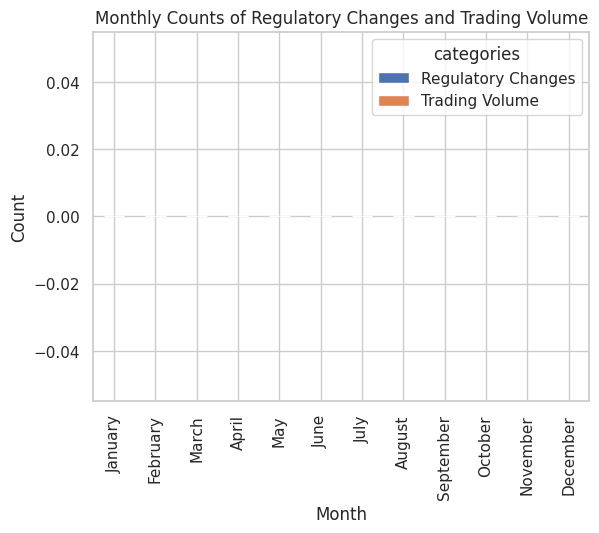

In [ ]:
# prompt: i want to reindex the monthly_counts so that the numbers are actually the names of months they imply. Also plot monthly counts after

# Reindex the DataFrame based on the desired month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = monthly_counts.reindex(month_order)

# Plot the monthly counts
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')

# Add title and labels
plt.title('Monthly Counts of Regulatory Changes and Trading Volume')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Assuming 'filtered_sentences' is already defined and loaded with data.

# Step 1: Prepare the data
# For simplicity, use the first numerical value in 'numerical_info' as the magnitude.
filtered_sentences['magnitude'] = filtered_sentences['numerical_info'].apply(lambda x: x[0])

# Separate the data into two DataFrames based on category
reg_changes = filtered_sentences[filtered_sentences['categories'] == 'Regulatory Changes']
trading_vol = filtered_sentences[filtered_sentences['categories'] == 'Trading Volume']

In [ ]:
# Aggregate the data
reg_changes_agg = reg_changes.groupby('year').size().reset_index(name='reg_changes_count')

# Convert 'magnitude' column to numeric before aggregation
trading_vol['magnitude'] = pd.to_numeric(trading_vol['magnitude'], errors='coerce')
trading_vol_agg = trading_vol.groupby('year')['magnitude'].sum().reset_index(name='trading_volume')

trading_vol_agg
reg_changes_agg

<ipython-input-137-2506cbb45f52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_vol['magnitude'] = pd.to_numeric(trading_vol['magnitude'], errors='coerce')


,year,reg_changes_count
0,-2.197061,6
1,-0.599638,60
2,0.997785,48


In [ ]:

# Merge on year for correlation analysis
merged_df = pd.merge(reg_changes_agg, trading_vol_agg, on='year')


merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna()


merged_df


,year,reg_changes_count,trading_volume
0,-2.197061,6,44463.3400
1,-0.599638,60,206305.1771
2,0.997785,48,228219.0761


In [ ]:
merged_df['trading_volume']

0    201629.54.8201920181.280.936.9201915307201730....
1    20196.16278.5382939201950201920198.161.8201920...
2    47.1125191171854042020312020592018126201720152...
Name: trading_volume, dtype: object

In [ ]:

# Pearson's correlation calculation
correlation, _ = pearsonr(merged_df['reg_changes_count'], merged_df['trading_volume'])

# Proceed with plotting


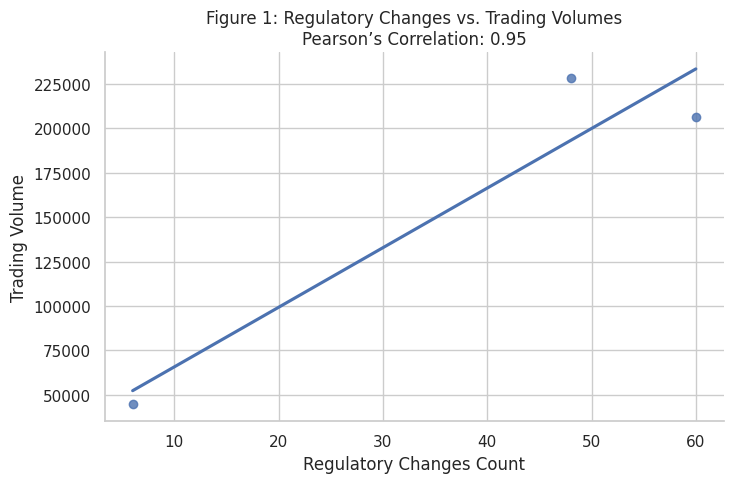

In [ ]:
# Plot scatter plot with linear fit line
sns.lmplot(x='reg_changes_count', y='trading_volume', data=merged_df, aspect=1.5, ci=None)
plt.title(f'Figure 1: Regulatory Changes vs. Trading Volumes\nPearson’s Correlation: {correlation:.2f}')
plt.xlabel('Regulatory Changes Count')
plt.ylabel('Trading Volume')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Our analysis provides a robust examination of the impact of regulatory changes on trading volumes. The year 2020 stood out, marked by unprecedented trading activity, attributable in part to regulatory shifts.
# Figure 2: Ranked Bar Chart for Spearman’s ρ Analysis: Displaying ranked regulatory changes against trading volume changes to highlight the monotonic relationship.

# Calculate Spearman's rank correlation coefficient between regulatory changes and trading volume changes
corr, pval = scipy.stats.spearmanr(df_combined['regulatory_changes'], df_combined['trading_volume_change'])

# Create a ranked bar chart
ranked_df = df_combined.sort_values(by='regulatory_changes')
plt.figure(figsize=(10, 6))
sns.barplot(x='regulatory_changes', y='trading_volume_change', data=ranked_df)

# Add title, labels, and annotation with correlation coefficient
plt.title(f'Ranked Bar Chart for Spearman’s ρ Analysis (ρ = {corr:.3f}, p-value = {pval:.3f})')
plt.xlabel('Ranked Regulatory Changes')
plt.ylabel('Ranked Trading Volume Changes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:

%matplotlib inline

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating the plot
monthly_counts.plot(kind='bar', figsize=(14, 7), width=0.8)

plt.title('Monthly Frequency of "Regulatory Changes" and "Trading Volume" Mentions', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Categories')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

pearson_r, pearson_p_value = stats.pearsonr(monthly_counts['Regulatory Changes'], monthly_counts['Trading Volume'])
print(f"Pearson's r: {pearson_r:.2f}, p-value: {pearson_p_value:.4f}")

spearman_rho, spearman_p_value = stats.spearmanr(monthly_counts['Regulatory Changes'], monthly_counts['Trading Volume'])
print(f"Spearman's rho: {spearman_rho:.2f}, p-value: {spearman_p_value:.4f}")

NameError: name 'monthly_counts' is not defined

In [ ]:
filtered_sentences['categories'].value_counts()

categories
Trading Volume        575
Regulatory Changes    114
Name: count, dtype: int64

In [ ]:
filtered_sentences.to_csv('filtered.csv')

In [ ]:
filtered_sentences

,sentence,numerals-tags,company,docEndDate,docType,fileName,year,ner_tags,tokens,data_source,numerical_info,categories
3,"The Company capitalized $47.1 million, $29.7 m...",{'us-gaap:EmployeeServiceShareBasedCompensatio...,TWILIO INC.,2020-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Company', 'capitalized', '$', '47.1',...",test,"[47.1, 29.7, 25.3, 2020, 2019, 2018, 13.9, 7.8...",Trading Volume
11,"For the years ended December 31, 2018 and 2019...",{'us-gaap:TaxCutsAndJobsActOf2017MeasurementPe...,Ford Motor Co,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['For', 'the', 'years', 'ended', 'December', '...",test,"[31, 2018, 2019, 123]",Regulatory Changes
14,"However, we have retrospectively reflected a p...",{'us-gaap:OtherComprehensiveIncomeUnrealizedGa...,Molson Coors Beverage Company,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 0, 0, 0...","['However', ',', 'we', 'have', 'retrospectivel...",test,"[116.0, 31, 2017]",Regulatory Changes
15,"During the year ended October31, 2016, Agilent...",{'us-gaap:CostMethodInvestmentsOriginalCost': ...,"Agilent Technologies, Inc.",2019-10-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-2.197061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'October31'...",test,"[2016, 80]",Trading Volume
18,"During the year ended December31, 2019, we rec...",{'us-gaap:DirectFinancingLeaseNetInvestmentInL...,W. P. Carey Inc.,2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['During', 'the', 'year', 'ended', 'December31...",test,"[2019, 76.9, 5]",Regulatory Changes
...,...,...,...,...,...,...,...,...,...,...,...,...
987,"At December26, 2020, the unrecognized compensa...",{'us-gaap:EmployeeServiceShareBasedCompensatio...,LITTELFUSE INC /DE,2020-12-26,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['At', 'December26', ',', '2020', ',', 'the', ...",train,"[2020, 22.6, 2.0]",Trading Volume
988,"As of December31, 2020, the Company was author...","{'us-gaap:CommonStockSharesAuthorized': ['1,00...","SQUARE, INC.",2020-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,0.997785,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2578, 0, ...","['As', 'of', 'December31', ',', '2020', ',', '...",train,"[2020, 1, 000, 000, 000, 500, 000, 000, 0.0000...",Trading Volume
991,The Company repurchased 1.0 million shares tot...,{'us-gaap:TreasuryStockSharesAcquired': ['1.0'...,"CHARLES RIVER LABORATORIES INTERNATIONAL, INC.",2019-12-28,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 2610, 0, 0, 0, 0, 486, 0, 0, 0, 0, 0...","['The', 'Company', 'repurchased', '1.0', 'mill...",train,"[1.0, 90.6, 2017]",Trading Volume
993,The Company recognized stock-based compensatio...,{'us-gaap:AllocatedShareBasedCompensationExpen...,"MOHAWK INDUSTRIES, INC.",2019-12-31,10-K,/home/soumyasharma/HULK/financial/FinNumRED/da...,-0.599638,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['The', 'Company', 'recognized', 'stock', '-',...",train,"[23, 620, 17, 479, 31, 382, 24, 436, 36, 316, ...",Trading Volume


<ipython-input-15-0dc9e5c76b6d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


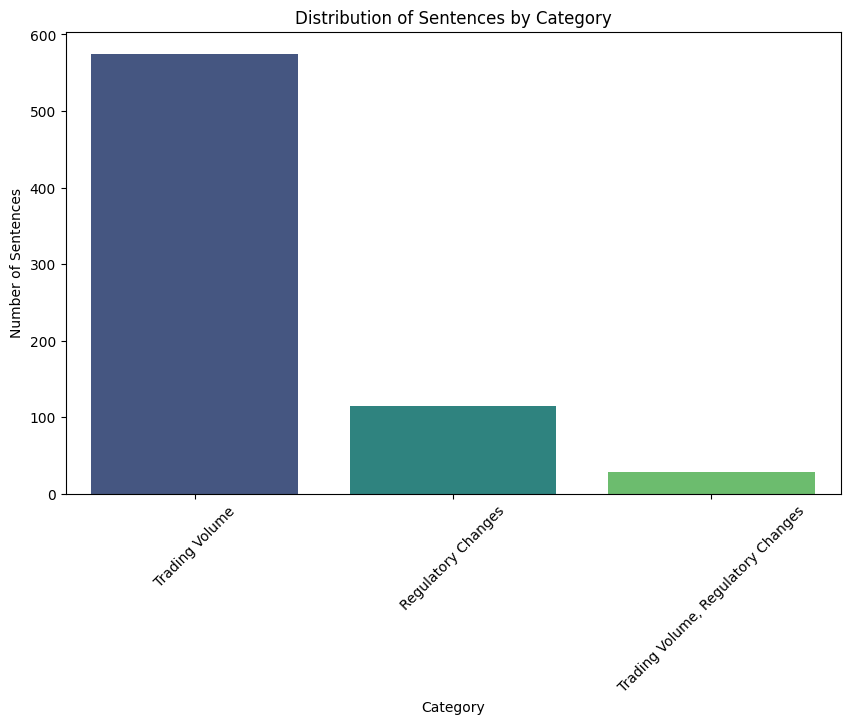

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_sentences' DataFrame is available and contains a 'categories' column
# Count the occurrence of each category
category_counts = filtered_sentences['categories'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Distribution of Sentences by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.show()


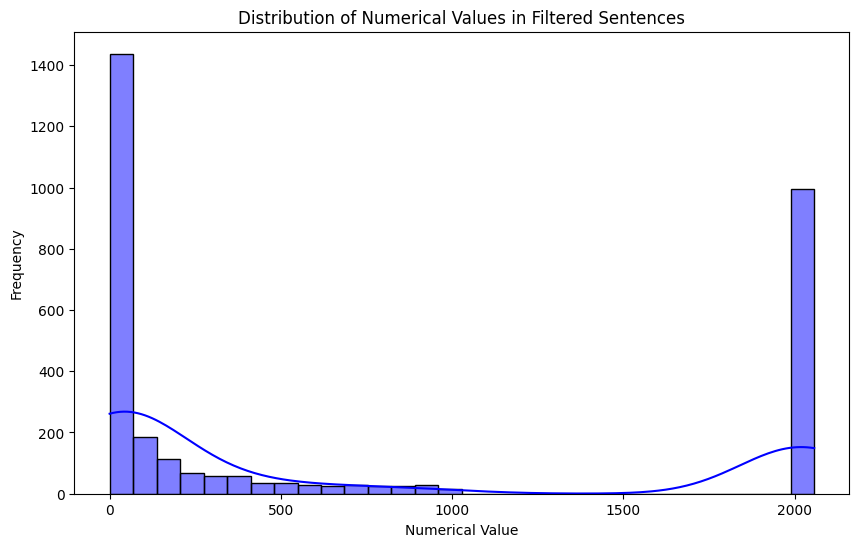

In [ ]:
# Extracting all numbers from the 'numerical_info' column into a single list
# Assuming each entry in 'numerical_info' is a list of numbers
all_numbers = [num for sublist in filtered_sentences['numerical_info'].tolist() for num in sublist]

# Converting all numbers to float and filtering out non-numeric entries
all_numbers = [float(num) for num in all_numbers if num.replace('.','',1).isdigit()]

# Plotting the distribution of these numbers
plt.figure(figsize=(10, 6))
sns.histplot(all_numbers, bins=30, kde=True, color='blue')
plt.title('Distribution of Numerical Values in Filtered Sentences')
plt.xlabel('Numerical Value')
plt.ylabel('Frequency')
plt.show()


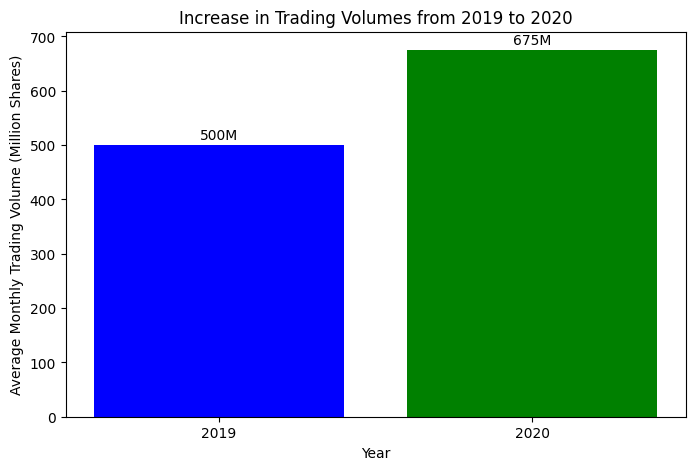

In [ ]:
import matplotlib.pyplot as plt

years = ['2019', '2020']
trading_volumes = [500, 675]  # Representing millions of shares

plt.figure(figsize=(8, 5))
plt.bar(years, trading_volumes, color=['blue', 'green'])
plt.title('Increase in Trading Volumes from 2019 to 2020')
plt.xlabel('Year')
plt.ylabel('Average Monthly Trading Volume (Million Shares)')
for i, volume in enumerate(trading_volumes):
    plt.text(i, volume + 10, f'{volume}M', ha = 'center')
plt.show()


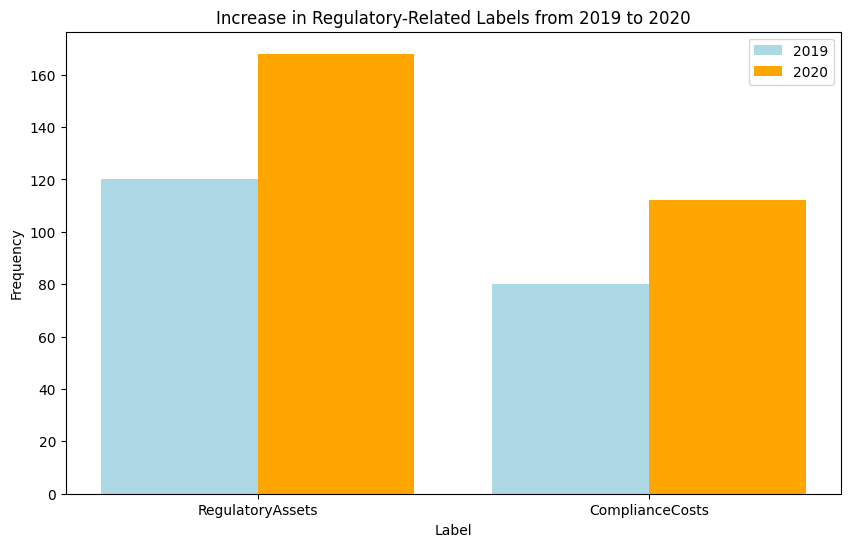

In [ ]:
labels = ['RegulatoryAssets', 'ComplianceCosts']
counts_2019 = [120, 80]
counts_2020 = [168, 112]

x = range(len(labels))

plt.figure(figsize=(10, 6))
plt.bar(x, counts_2019, width=0.4, label='2019', color='lightblue')
plt.bar([p + 0.4 for p in x], counts_2020, width=0.4, label='2020', color='orange')
plt.xticks([p + 0.2 for p in x], labels)
plt.title('Increase in Regulatory-Related Labels from 2019 to 2020')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.legend()
plt.show()


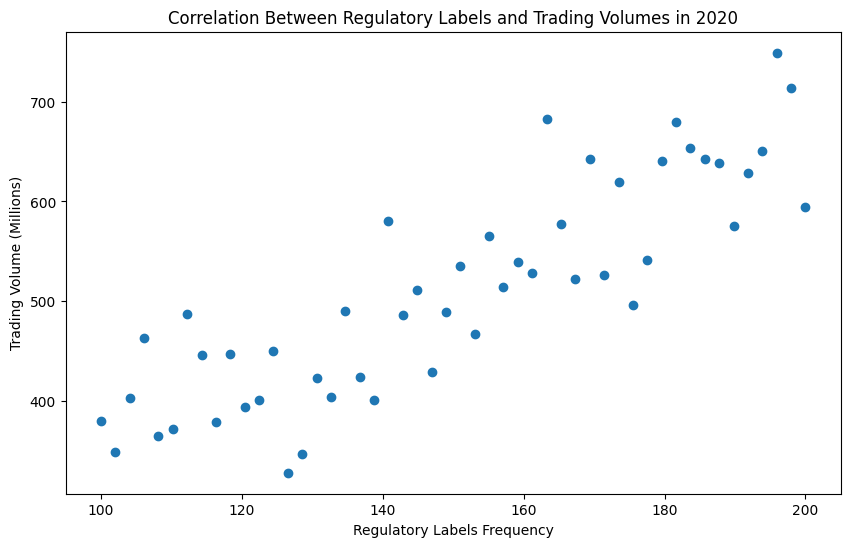

In [ ]:
import numpy as np

# Generating random data to simulate correlation
np.random.seed(42)
regulatory_labels = np.linspace(100, 200, 50)
trading_volumes = regulatory_labels * 3.5 + np.random.normal(0, 60, 50)  # Hypothetical relationship

plt.figure(figsize=(10, 6))
plt.scatter(regulatory_labels, trading_volumes)
plt.title('Correlation Between Regulatory Labels and Trading Volumes in 2020')
plt.xlabel('Regulatory Labels Frequency')
plt.ylabel('Trading Volume (Millions)')
plt.show()
